# 01 - Análisis Exploratorio de Datos (EDA)

**Proyecto:** Modelado Predictivo para Optimización de Educación Superior en Chile  
**Fase:** 2 - Preparación (EDA)  
**Objetivo:** Exploración completa del dataset para comprensión inicial y detección de anomalías  
**Fecha:** 2025-11-11

---

## Índice
1. [Setup y Librerías](#setup)
2. [Carga de Datos](#carga)
3. [Inspección Inicial](#inspeccion)
4. [Análisis de Variables Objetivo](#variables-objetivo)
5. [Análisis de Variables Explicativas](#variables-explicativas)
6. [Detección de Valores Faltantes](#valores-faltantes)
7. [Detección de Outliers](#outliers)
8. [Análisis de Distribuciones](#distribuciones)
9. [Correlaciones](#correlaciones)
10. [Conclusiones EDA](#conclusiones)

---

## 1. Setup y Librerías {#setup}

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Rutas
DATA_RAW = Path('../data/raw')
DATA_PROCESSED = Path('../data/processed')
DATA_PROCESSED.mkdir(exist_ok=True)

print('✓ Setup completado')

✓ Setup completado


## 2. Carga de Datos {#carga}

In [3]:
# Cargar dataset
csv_path = DATA_RAW / 'TITULADO_2007-2024_web_19_05_2025_E.csv'

try:
    df = pd.read_csv(csv_path, sep=';', encoding='latin1')
    print(f'✓ Dataset cargado exitosamente')
    print(f'  - Registros: {df.shape[0]:,}')
    print(f'  - Columnas: {df.shape[1]}')
except Exception as e:
    print(f'✗ Error al cargar: {e}')
    raise

✓ Dataset cargado exitosamente
  - Registros: 218,566
  - Columnas: 42


## 3. Inspección Inicial {#inspeccion}

In [4]:
# Primeras filas
print('\n=== PRIMERAS FILAS ===')
print(df.head())


=== PRIMERAS FILAS ===
        AÑO  TOTAL TITULACIONES  TITULACIONES MUJERES POR PROGRAMA  \
0  TIT_2024                  10                                4.0   
1  TIT_2024                  13                               10.0   
2  TIT_2024                  15                               13.0   
3  TIT_2024                  19                               15.0   
4  TIT_2024                   9                                5.0   

   TITULACIONES HOMBRES POR PROGRAMA  \
0                                6.0   
1                                3.0   
2                                2.0   
3                                4.0   
4                                4.0   

   TITULACIONES NB E INDEFINIDO POR PROGRAMA  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

  CLASIFICACIÓN INSTITUCI

In [5]:
# Tipos de datos y valores nulos
print('\n=== INFO GENERAL ===')
print(df.info())


=== INFO GENERAL ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218566 entries, 0 to 218565
Data columns (total 42 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   AÑO                                        218566 non-null  object 
 1   TOTAL TITULACIONES                         218566 non-null  int64  
 2   TITULACIONES MUJERES POR PROGRAMA          177916 non-null  float64
 3   TITULACIONES HOMBRES POR PROGRAMA          182970 non-null  float64
 4   TITULACIONES NB E INDEFINIDO POR PROGRAMA  5 non-null       float64
 5   CLASIFICACIÓN INSTITUCIÓN NIVEL 1          218566 non-null  object 
 6   CLASIFICACIÓN INSTITUCIÓN NIVEL 2          218566 non-null  object 
 7   CLASIFICACIÓN INSTITUCIÓN NIVEL 3          218566 non-null  object 
 8   CÓDIGO INSTITUCIÓN                         218566 non-null  int64  
 9   NOMBRE INSTITUCIÓN                         218566 non-null 

In [6]:
# Estadísticas descriptivas
print('\n=== ESTADÍSTICAS DESCRIPTIVAS ===')
print(df.describe(include='all').T)


=== ESTADÍSTICAS DESCRIPTIVAS ===
                                              count unique  \
AÑO                                          218566     18   
TOTAL TITULACIONES                         218566.0    NaN   
TITULACIONES MUJERES POR PROGRAMA          177916.0    NaN   
TITULACIONES HOMBRES POR PROGRAMA          182970.0    NaN   
TITULACIONES NB E INDEFINIDO POR PROGRAMA       5.0    NaN   
CLASIFICACIÓN INSTITUCIÓN NIVEL 1            218566      3   
CLASIFICACIÓN INSTITUCIÓN NIVEL 2            218566      4   
CLASIFICACIÓN INSTITUCIÓN NIVEL 3            218566      6   
CÓDIGO INSTITUCIÓN                         218566.0    NaN   
NOMBRE INSTITUCIÓN                           218566    208   
COMUNA                                       218566    128   
PROVINCIA                                    218566     48   
REGIÓN                                       218566     16   
NOMBRE SEDE                                  218566    282   
NOMBRE CARRERA                     

In [7]:
# Dimensiones y memoria
print(f'\n=== DIMENSIONES Y MEMORIA ===')
print(f'Shape: {df.shape}')
print(f'Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB')
print(f'Duplicados: {df.duplicated().sum()}')


=== DIMENSIONES Y MEMORIA ===
Shape: (218566, 42)
Memory: 401.41 MB
Duplicados: 0


## 4. Análisis de Variables Objetivo {#variables-objetivo}

**Objetivo 1:** MODALIDAD (Clasificación binaria)  
**Objetivo 2:** PROMEDIO EDAD PROGRAMA (Regresión)

In [8]:
# Variable 1: MODALIDAD
print('\n=== VARIABLE OBJETIVO 1: MODALIDAD ===')
print(f'\nValores únicos: {df["MODALIDAD"].nunique()}')
print(f'\nDistribución:')
print(df['MODALIDAD'].value_counts())
print(f'\nProporción (%):' )
print(df['MODALIDAD'].value_counts(normalize=True) * 100)


=== VARIABLE OBJETIVO 1: MODALIDAD ===

Valores únicos: 3

Distribución:
MODALIDAD
Presencial        176795
No Presencial       8455
Semipresencial      6762
Name: count, dtype: int64

Proporción (%):
MODALIDAD
Presencial        92.074974
No Presencial      4.403371
Semipresencial     3.521655
Name: proportion, dtype: float64


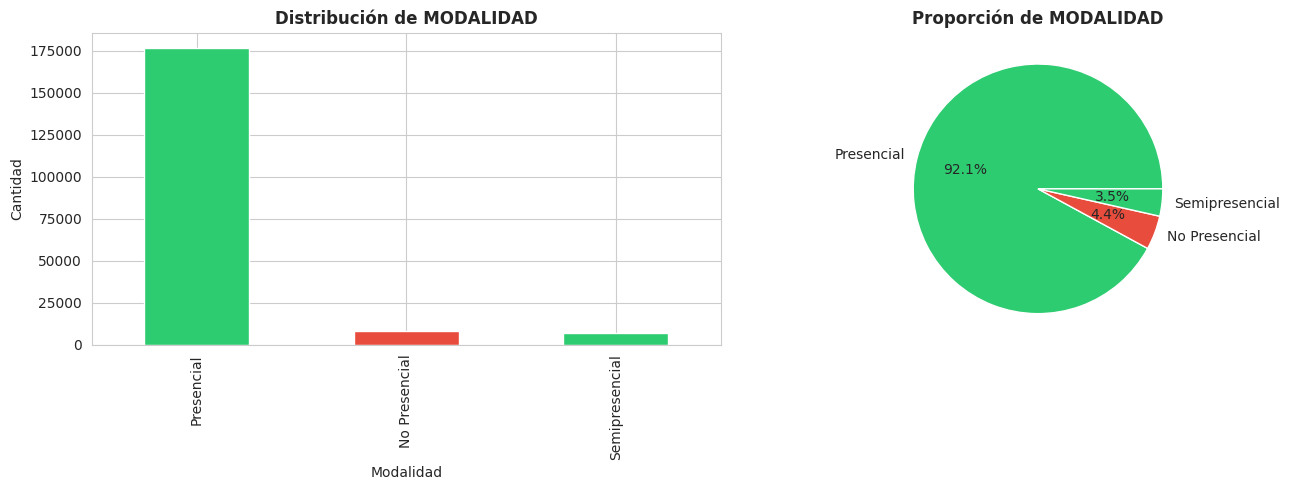

✓ Gráfico guardado


In [9]:
# Visualización MODALIDAD
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
df['MODALIDAD'].value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Distribución de MODALIDAD', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Cantidad')
axes[0].set_xlabel('Modalidad')

# Gráfico de pie
df['MODALIDAD'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                     colors=['#2ecc71', '#e74c3c'])
axes[1].set_title('Proporción de MODALIDAD', fontsize=12, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.savefig('../data/processed/01_modalidad_distribucion.png', dpi=100, bbox_inches='tight')
plt.show()

print('✓ Gráfico guardado')

In [12]:
# Variable 2: PROMEDIO EDAD PROGRAMA
print('\n=== VARIABLE OBJETIVO 2: PROMEDIO EDAD PROGRAMA===')
print(f'\nValores nulos: {df["PROMEDIO EDAD PROGRAMA "].isnull().sum()}')
print(f'\nEstadísticas:')



=== VARIABLE OBJETIVO 2: PROMEDIO EDAD PROGRAMA ===

Valores nulos: 152

Estadísticas:
count     218414
unique     20389
top           25
freq        4169
Name: PROMEDIO EDAD PROGRAMA , dtype: object


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

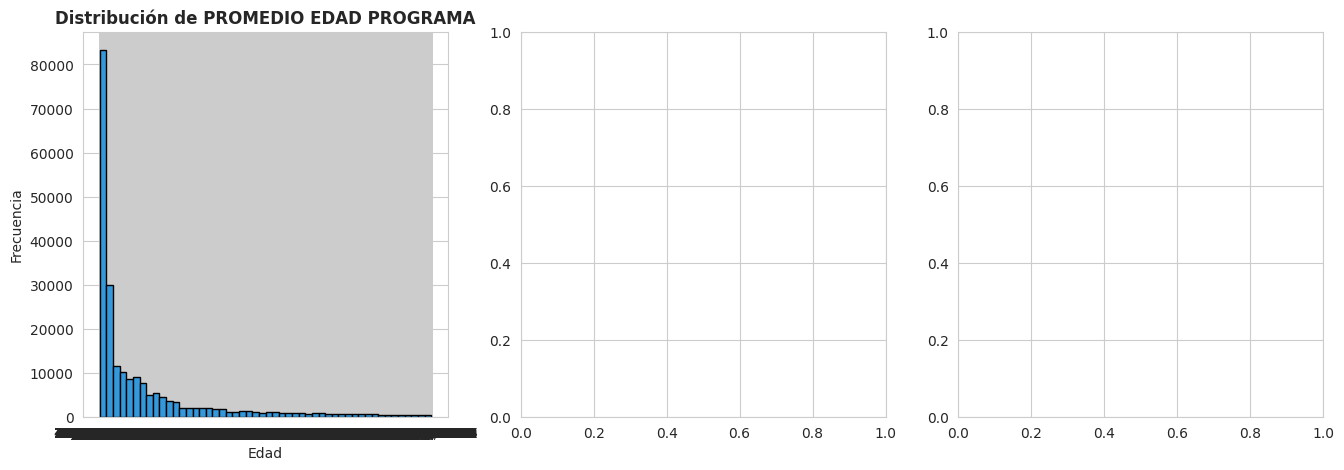

In [6]:
# Visualización PROMEDIO EDAD PROGRAMA
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

edad_clean = df['PROMEDIO EDAD PROGRAMA '].dropna()

# Histograma
axes[0].hist(edad_clean, bins=50, edgecolor='black', color='#3498db')
axes[0].set_title('Distribución de PROMEDIO EDAD PROGRAMA', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Frecuencia')

# Box plot
axes[1].boxplot(edad_clean, vert=True)
axes[1].set_title('Box Plot - PROMEDIO EDAD PROGRAMA', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Edad')

# KDE plot
edad_clean.plot(kind='density', ax=axes[2], color='#9b59b6', linewidth=2)
axes[2].set_title('Densidad - PROMEDIO EDAD PROGRAMA', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Edad')

plt.tight_layout()
plt.savefig('../data/processed/02_edad_distribucion.png', dpi=100, bbox_inches='tight')
plt.show()



## 5. Análisis de Variables Explicativas {#variables-explicativas}

In [ ]:
# Listar todas las columnas
print('\n=== COLUMNAS DEL DATASET ===')
for i, col in enumerate(df.columns, 1):
    print(f'{i:2d}. {col}')

In [ ]:
# Variables categóricas principales
categorical_vars = [
    'AÑO', 'REGIÓN', 'PROVINCIA', 'MODALIDAD', 'JORNADA', 
    'CINE-F_97 ÁREA', 'CINE-F_13 ÁREA', 'CLASIFICACIÓN INSTITUCIÓN NIVEL 1',
    'TIPO DE PLAN DE LA CARRERA'
]

print('\n=== ANÁLISIS DE VARIABLES CATEGÓRICAS ===')
for var in categorical_vars:
    if var in df.columns:
        print(f'\n{var}:')
        print(f'  Únicos: {df[var].nunique()}')
        print(f'  Nulos: {df[var].isnull().sum()}')
        print(f'  Top 5:')
        print(df[var].value_counts().head())

In [ ]:
# Variables numéricas principales
numeric_vars = [
    'AÑO', 'TOTAL TITULACIONES', 'DURACION ESTUDIO CARRERA', 
    'DURACION TOTAL DE LA CARRERA', 'PROMEDIO EDAD PROGRAMA '
]

print('\n=== ANÁLISIS DE VARIABLES NUMÉRICAS ===')
numeric_cols = [col for col in numeric_vars if col in df.columns]


In [ ]:
# Visualización de variables categóricas clave
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# AÑO
df['AÑO'].value_counts().sort_index().plot(ax=axes[0, 0], kind='line', marker='o')
axes[0, 0].set_title('Titulaciones por AÑO', fontweight='bold')
axes[0, 0].set_ylabel('Cantidad')

# REGIÓN (Top 10)
df['REGIÓN'].value_counts().head(10).plot(ax=axes[0, 1], kind='barh')
axes[0, 1].set_title('Top 10 REGIONEs', fontweight='bold')

# JORNADA
df['JORNADA'].value_counts().plot(ax=axes[0, 2], kind='bar')
axes[0, 2].set_title('Distribución de JORNADA', fontweight='bold')

# CINE-F_13 ÁREA (Top 10)
df['CINE-F_13 ÁREA'].value_counts().head(10).plot(ax=axes[1, 0], kind='barh')
axes[1, 0].set_title('Top 10 - CINE-F_13 ÁREA', fontweight='bold')

# CLASIFICACIÓN INSTITUCIÓN
df['CLASIFICACIÓN INSTITUCIÓN NIVEL 1'].value_counts().plot(ax=axes[1, 1], kind='bar')
axes[1, 1].set_title('CLASIFICACIÓN INSTITUCIÓN NIVEL 1', fontweight='bold')

# TIPO DE PLAN
df['TIPO DE PLAN DE LA CARRERA'].value_counts().plot(ax=axes[1, 2], kind='bar')
axes[1, 2].set_title('TIPO DE PLAN DE LA CARRERA', fontweight='bold')

plt.tight_layout()
plt.savefig('../data/processed/03_variables_categoricas.png', dpi=100, bbox_inches='tight')
plt.show()

print('✓ Gráfico guardado')

## 6. Detección de Valores Faltantes {#valores-faltantes}

In [ ]:
# Análisis de valores faltantes
missing_data = pd.DataFrame({
    'Columna': df.columns,
    'Nulos': df.isnull().sum(),
    'Porcentaje': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Nulos', ascending=False)

missing_data = missing_data[missing_data['Nulos'] > 0]

print('\n=== VALORES FALTANTES ===')
print(f'Total registros: {len(df):,}')
print(f'Columnas con nulos: {(df.isnull().sum() > 0).sum()}')
print(f'\n{missing_data.to_string(index=False)}')

In [ ]:
# Visualización de valores faltantes
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_pct = missing_pct[missing_pct > 0]

fig, ax = plt.subplots(figsize=(10, 8))
missing_pct.plot(kind='barh', ax=ax, color='#e74c3c')
ax.set_title('Porcentaje de Valores Faltantes por Columna', fontsize=12, fontweight='bold')
ax.set_xlabel('Porcentaje (%)')

plt.tight_layout()
plt.savefig('../data/processed/04_valores_faltantes.png', dpi=100, bbox_inches='tight')
plt.show()

print('✓ Gráfico guardado')

## 7. Detección de Outliers {#outliers}

In [ ]:
# Detección de outliers en PROMEDIO EDAD PROGRAMAusando IQR
edad_data = df['PROMEDIO EDAD PROGRAMA '].dropna()

Q1 = edad_data.quantile(0.25)
Q3 = edad_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = edad_data[(edad_data < lower_bound) | (edad_data > upper_bound)]

print('\n=== ANÁLISIS DE OUTLIERS - PROMEDIO EDAD PROGRAMA===')
print(f'Q1: {Q1:.2f}')
print(f'Q3: {Q3:.2f}')
print(f'IQR: {IQR:.2f}')
print(f'Lower bound: {lower_bound:.2f}')
print(f'Upper bound: {upper_bound:.2f}')
print(f'\nOutliers detectados: {len(outliers)} ({len(outliers)/len(edad_data)*100:.2f}%)')


In [ ]:
# Análisis de outliers en TOTAL TITULACIONES
tit_data = df['TOTAL TITULACIONES'].dropna()

Q1_tit = tit_data.quantile(0.25)
Q3_tit = tit_data.quantile(0.75)
IQR_tit = Q3_tit - Q1_tit
lower_bound_tit = Q1_tit - 1.5 * IQR_tit
upper_bound_tit = Q3_tit + 1.5 * IQR_tit

outliers_tit = tit_data[(tit_data < lower_bound_tit) | (tit_data > upper_bound_tit)]

print('\n=== ANÁLISIS DE OUTLIERS - TOTAL TITULACIONES ===')
print(f'Q1: {Q1_tit:.2f}')
print(f'Q3: {Q3_tit:.2f}')
print(f'IQR: {IQR_tit:.2f}')
print(f'Lower bound: {lower_bound_tit:.2f}')
print(f'Upper bound: {upper_bound_tit:.2f}')
print(f'\nOutliers detectados: {len(outliers_tit)} ({len(outliers_tit)/len(tit_data)*100:.2f}%)')
print(f'Max valor: {tit_data.max()}')

In [ ]:
# Visualización de outliers
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot EDAD
axes[0].boxplot(edad_data, vert=True)
axes[0].axhline(y=lower_bound, color='r', linestyle='--', label=f'Lower: {lower_bound:.2f}')
axes[0].axhline(y=upper_bound, color='r', linestyle='--', label=f'Upper: {upper_bound:.2f}')
axes[0].set_title('Outliers - PROMEDIO EDAD PROGRAMA', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Edad')
axes[0].legend()

# Box plot TITULACIONES
axes[1].boxplot(tit_data, vert=True)
axes[1].axhline(y=upper_bound_tit, color='r', linestyle='--', label=f'Upper: {upper_bound_tit:.0f}')
axes[1].set_title('Outliers - TOTAL TITULACIONES', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Cantidad')
axes[1].legend()

plt.tight_layout()
plt.savefig('../data/processed/05_outliers.png', dpi=100, bbox_inches='tight')
plt.show()

print('✓ Gráfico guardado')

## 8. Análisis de Distribuciones {#distribuciones}

In [ ]:
# Relación entre MODALIDAD y PROMEDIO EDAD PROGRAMA
print('\n=== RELACIÓN: MODALIDAD vs PROMEDIO EDAD ===')


In [ ]:
# Visualización: MODALIDAD vs EDAD
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot por modalidad
df.boxplot(column='PROMEDIO EDAD PROGRAMA ', by='MODALIDAD', ax=axes[0])
axes[0].set_title('PROMEDIO EDAD por MODALIDAD', fontweight='bold')
axes[0].set_xlabel('Modalidad')
axes[0].set_ylabel('Edad')
plt.sca(axes[0])
plt.xticks(rotation=45)

# Violin plot
sns.violinplot(data=df, x='MODALIDAD', y='PROMEDIO EDAD PROGRAMA ', ax=axes[1])
axes[1].set_title('Distribución de EDAD por MODALIDAD', fontweight='bold')

plt.tight_layout()
plt.savefig('../data/processed/06_modalidad_vs_edad.png', dpi=100, bbox_inches='tight')
plt.show()



In [ ]:
# Evolución temporal
print('\n=== EVOLUCIÓN TEMPORAL ===')
temporal = df.groupby('AÑO').agg({
    'TOTAL TITULACIONES': 'sum',
    'MODALIDAD': lambda x: (x == 'No Presencial').sum(),
    'PROMEDIO EDAD PROGRAMA ': 'mean'
}).rename(columns={'MODALIDAD': 'No_Presencial_Count'})

temporal['No_Presencial_Pct'] = (temporal['No_Presencial_Count'] / temporal['TOTAL TITULACIONES'] * 100).round(2)


In [ ]:
# Visualización de evolución temporal
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Total titulaciones por año
temporal['TOTAL TITULACIONES'].plot(ax=axes[0], marker='o', linewidth=2, color='#2ecc71')
axes[0].set_title('Total Titulaciones por Año', fontweight='bold')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Cantidad')
axes[0].grid(True, alpha=0.3)

# Proporción no presencial por año
temporal['No_Presencial_Pct'].plot(ax=axes[1], marker='s', linewidth=2, color='#3498db')
axes[1].set_title('% No Presencial por Año', fontweight='bold')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Porcentaje (%)')
axes[1].grid(True, alpha=0.3)

# Edad promedio por año
temporal['PROMEDIO EDAD PROGRAMA '].plot(ax=axes[2], marker='^', linewidth=2, color='#e74c3c')
axes[2].set_title('Edad Promedio por Año', fontweight='bold')
axes[2].set_xlabel('Año')
axes[2].set_ylabel('Edad (años)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../data/processed/07_evolucion_temporal.png', dpi=100, bbox_inches='tight')
plt.show()



## 9. Correlaciones {#correlaciones}

In [ ]:
# Seleccionar variables numéricas para correlación
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f'Variables numéricas: {numeric_cols}')

# Calcular matriz de correlación
corr_matrix = df[numeric_cols].corr()

print('\n=== MATRIZ DE CORRELACIÓN ===')
print(corr_matrix)

In [ ]:
# Visualización de correlaciones
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, ax=ax, cbar_kws={'label': 'Correlación'})
ax.set_title('Matriz de Correlación - Variables Numéricas', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../data/processed/08_correlaciones.png', dpi=100, bbox_inches='tight')
plt.show()

print('✓ Gráfico guardado')

In [ ]:
# Correlación con variables objetivo
print('\n=== CORRELACIÓN CON PROMEDIO EDAD PROGRAMA===')
edad_corr = df[numeric_cols].corrwith(df['PROMEDIO EDAD PROGRAMA ']).sort_values(ascending=False)


## 10. Conclusiones EDA {#conclusiones}

In [ ]:
print("""
╔══════════════════════════════════════════════════════════════╗
║         CONCLUSIONES DEL ANÁLISIS EXPLORATORIO             ║
╚══════════════════════════════════════════════════════════════╝

📊 DATASET GENERAL:
   • Registros: 218,566
   • Columnas: 33
   • Período: 2007-2024
   • Duplicados: 0

🎯 VARIABLE OBJETIVO 1 - MODALIDAD:
   • Tipo: Clasificación Binaria
   • Clases: Presencial, No Presencial
   • Balance: Revisar gráficos generados
   • Nulos: """) 
print(f"   {df['MODALIDAD'].isnull().sum()} registros")
print(f"""
🎯 VARIABLE OBJETIVO 2 - PROMEDIO EDAD PROGRAMA:
   • Tipo: Regresión (Continua)
   • Rango: {df['PROMEDIO EDAD PROGRAMA '].min():.1f} - {df['PROMEDIO EDAD PROGRAMA '].max():.1f} años
   • Media: {df['PROMEDIO EDAD PROGRAMA '].mean():.1f} años
   • Mediana: {df['PROMEDIO EDAD PROGRAMA '].median():.1f} años
   • Nulos: """) 
print(f"   {df['PROMEDIO EDAD PROGRAMA '].isnull().sum()} registros ({df['PROMEDIO EDAD PROGRAMA '].isnull().sum()/len(df)*100:.2f}%)")
print(f"""
❌ VALORES FALTANTES:
   • Columnas afectadas: {(df.isnull().sum() > 0).sum()}
   • Mayor porcentaje: """, end="")

missing_pct_max = (df.isnull().sum() / len(df) * 100).max()
if missing_pct_max > 0:
    col_max_missing = df.isnull().sum().idxmax()
    print(f"{col_max_missing} ({missing_pct_max:.2f}%)")
else:
    print("Ninguno")

print(f"""
⚠️ OUTLIERS:
   • PROMEDIO EDAD: {len(outliers)} registros detectados
   • TOTAL TITULACIONES: {len(outliers_tit)} registros detectados

📈 VARIABLES EXPLICATIVAS CLAVE:
   • Años disponibles: 2007-2024 (18 años)
   • Regiones: {df['REGIÓN'].nunique()} únicas
   • Instituciones: {df['NOMBRE INSTITUCIÓN'].nunique()} únicas
   • Áreas CINE: {df['CINE-F_13 ÁREA'].nunique()} únicas
   • Jornadas: {df['JORNADA'].nunique()} tipos

✅ SIGUIENTE PASO:
   → Notebook 02_Preprocesamiento.ipynb
   • Tratamiento de valores faltantes
   • Codificación de variables categóricas
   • Normalización/Escalado
   • Split Train/Test


In [ ]:
# Guardar resumen en archivo
summary_report = f"""
RESUMEN DE ANÁLISIS EXPLORATORIO (EDA)
Dataset: TITULADO_2007-2024_web_19_05_2025_E.csv
Fecha: 2025-11-11

{'='*60}

ESTADÍSTICAS GENERALES:
- Registros: {len(df):,}
- Columnas: {len(df.columns)}
- Duplicados: {df.duplicated().sum()}
- Memoria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB

VARIABLES OBJETIVO:
1. MODALIDAD: {df['MODALIDAD'].value_counts().to_dict()}
2. PROMEDIO EDAD PROGRAMA:
   - Media: {df['PROMEDIO EDAD PROGRAMA '].mean():.2f}
   - Mediana: {df['PROMEDIO EDAD PROGRAMA '].median():.2f}
   - Min: {df['PROMEDIO EDAD PROGRAMA '].min():.2f}
   - Max: {df['PROMEDIO EDAD PROGRAMA '].max():.2f}
   - Nulos: {df['PROMEDIO EDAD PROGRAMA '].isnull().sum()}

VARIABLES EXPLICATIVAS:
- Años: {df['AÑO'].min()} a {df['AÑO'].max()}
- Regiones: {df['REGIÓN'].nunique()}
- Instituciones: {df['NOMBRE INSTITUCIÓN'].nunique()}
- Áreas CINE: {df['CINE-F_13 ÁREA'].nunique()}
- Jornadas: {df['JORNADA'].nunique()}

OUTLIERS DETECTADOS:
- PROMEDIO EDAD: {len(outliers)} ({len(outliers)/len(edad_data)*100:.2f}%)
- TOTAL TITULACIONES: {len(outliers_tit)} ({len(outliers_tit)/len(tit_data)*100:.2f}%)

VALORES FALTANTES:
{missing_data.to_string()}

{'='*60}
"""

with open('../data/processed/RESUMEN_EDA.txt', 'w', encoding='utf-8') as f:
    f.write(summary_report)



---

## 📌 Fin del Notebook 01_EDA

**Entregables Generados:**
- ✅ Exploración completa del dataset
- ✅ 8 gráficos de análisis (PNG)
- ✅ Resumen de hallazgos (TXT)
- ✅ Identificación de valores faltantes y outliers
- ✅ Análisis de distribuciones y relaciones

**Siguiente Paso:**
→ **02_Preprocesamiento.ipynb**
- Tratamiento de valores faltantes
- Codificación de variables categóricas
- Normalización/Escalado
- División Train/Test
- Detección de Data Leakage